In [1]:
#Gerekli Kü

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('D:/softwareDev/hangiKrediData/hiringChallenge/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
url = "D:/softwareDev/hangiKrediData/hiringChallenge/term-deposit-marketing.csv"
from sklearn import preprocessing
#from sklearn.processing import skimage, MinMaxScaler, StandartScaler

D:/softwareDev/hangiKrediData/hiringChallenge/hangiKrediDataChallenge.ipynb
D:/softwareDev/hangiKrediData/hiringChallenge/term-deposit-marketing.csv
D:/softwareDev/hangiKrediData/hiringChallenge/.ipynb_checkpoints\hangiKrediDataChallenge-checkpoint.ipynb


In [2]:
data = pd.read_csv(url)

In [3]:
data =data.drop(['duration'],axis=1)
print(data.shape)
data.head()

(40000, 13)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  campaign   40000 non-null  int64 
 12  y          40000 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.0+ MB


In [5]:
#dataframe'de bulunan numerik özet ifadelerin yer aldığı tablo

data.describe()

,age,balance,day,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,2.882175
std,9.641776,2903.769716,8.278127,3.239051
min,19.000000,-8019.000000,1.000000,1.000000
25%,33.000000,54.000000,8.000000,1.000000
50%,39.000000,407.000000,17.000000,2.000000
75%,48.000000,1319.000000,21.000000,3.000000
max,95.000000,102127.000000,31.000000,63.000000


In [6]:
data["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [7]:
data["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [8]:
data["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81], dtype=int64)

In [9]:
data["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [10]:
data["default"].unique()

array(['no', 'yes'], dtype=object)

In [11]:
data["balance"].unique()

array([  2143,     29,      2, ...,   7222,   3402, 102127], dtype=int64)

In [12]:
data["housing"].unique()

array(['yes', 'no'], dtype=object)

In [13]:
data["loan"].unique()

array(['no', 'yes'], dtype=object)

In [14]:
data["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [15]:
data["day"].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [16]:
data["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr'], dtype=object)

In [17]:
data["campaign"].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

İlk önce kategorik değişkenlerin keşifsel analizine başlıyoruz ve kategorilerin neler olduğunu ve bu kategoriler için eksik değerler olup olmadığını görüyoruz. Burada, aşağıdaki çubuk grafikleri oluşturmak için seaborn paketini kullandık.

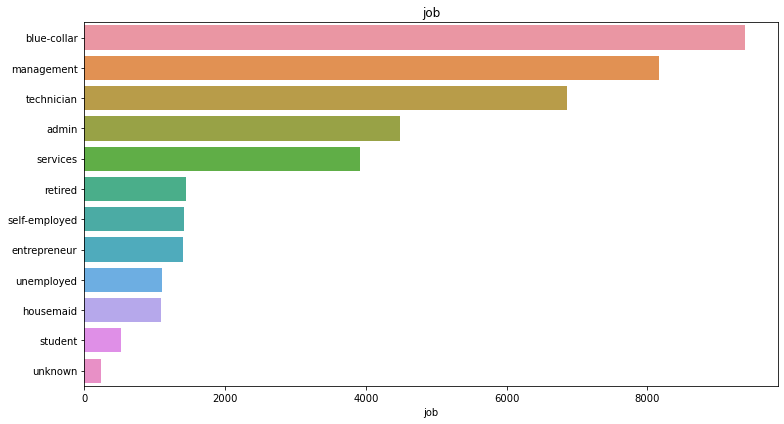

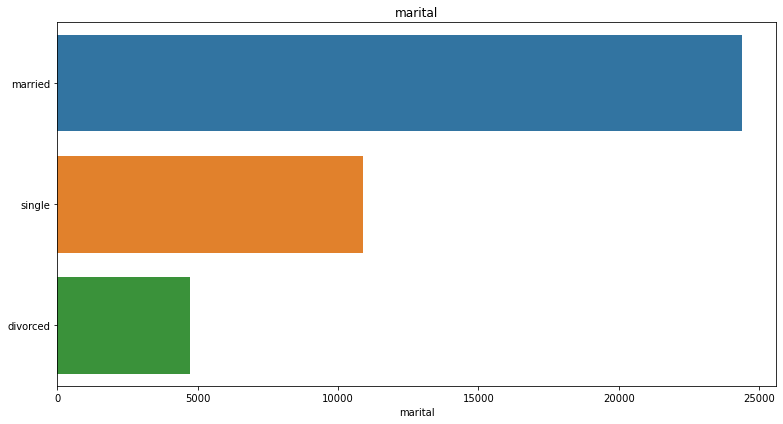

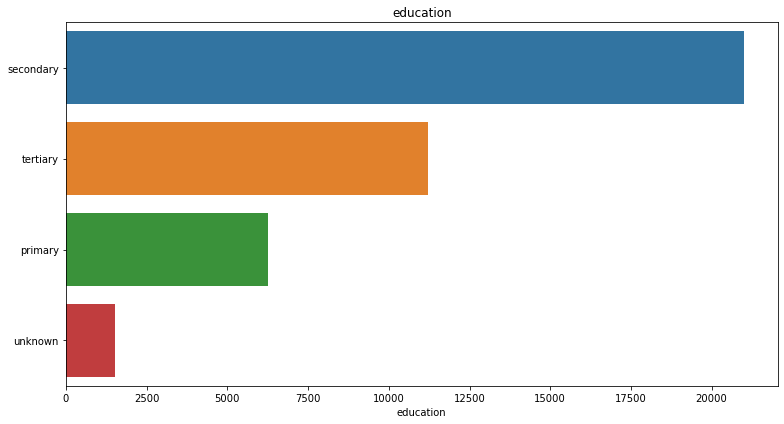

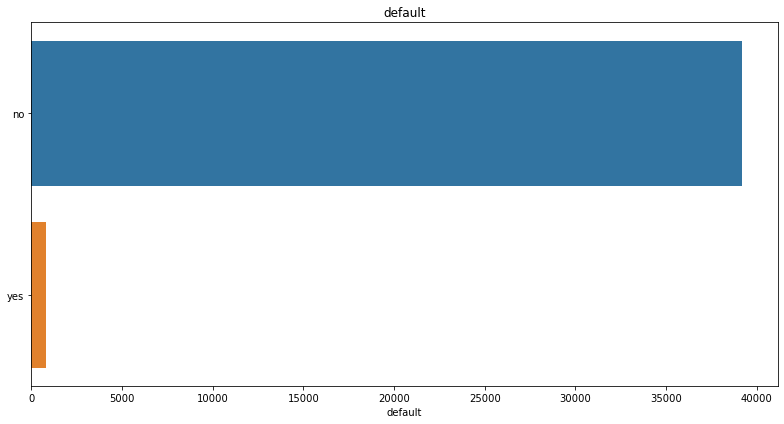

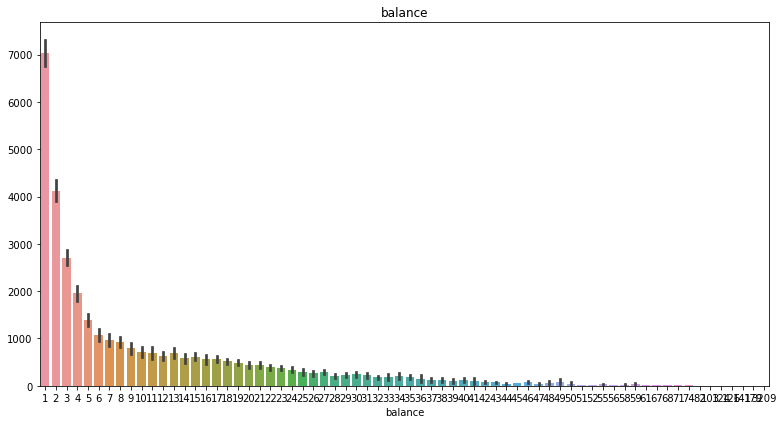

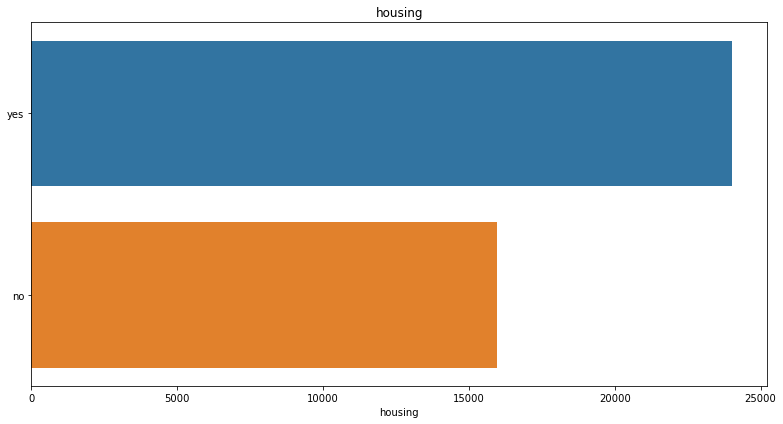

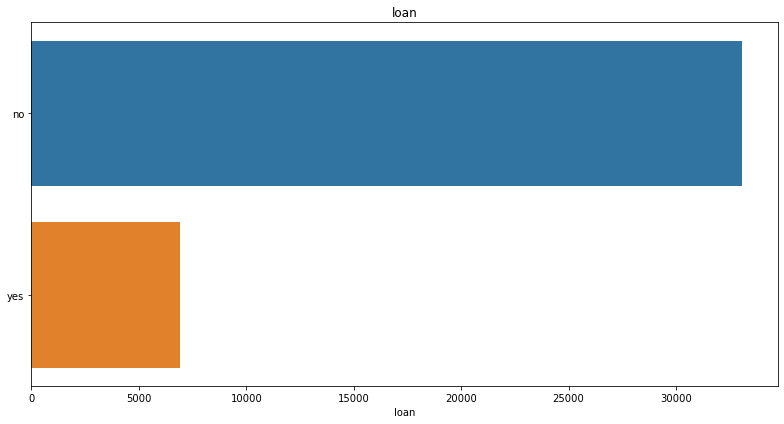

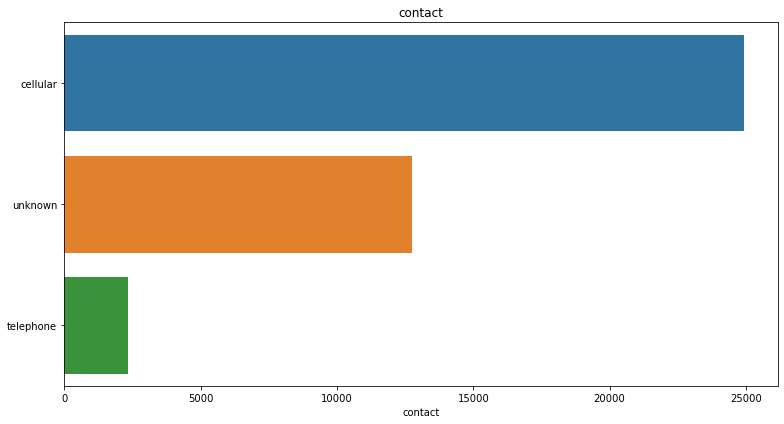

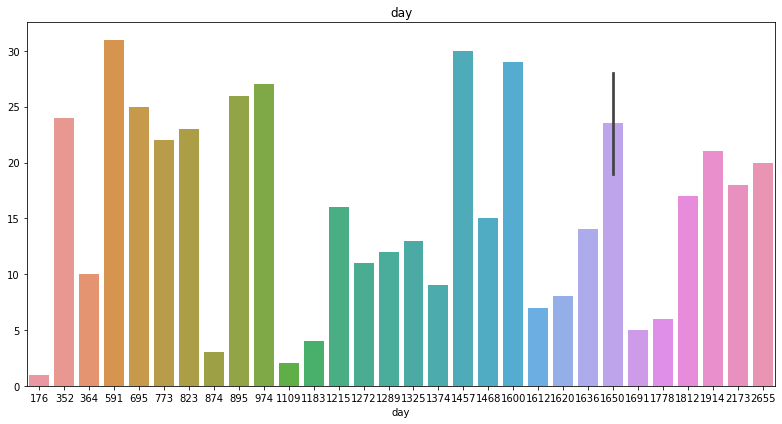

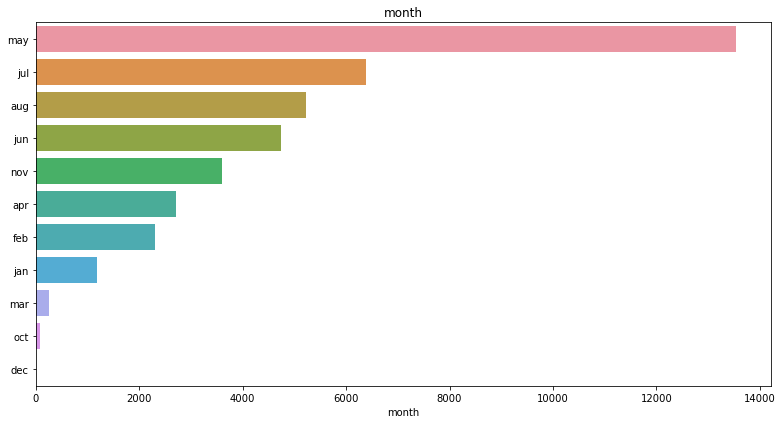

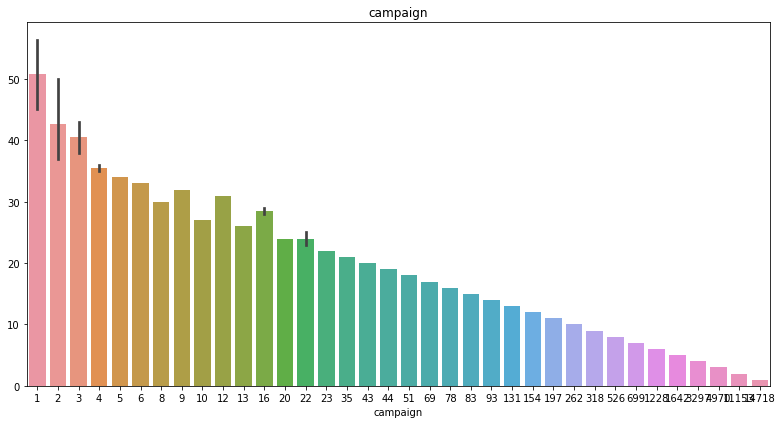

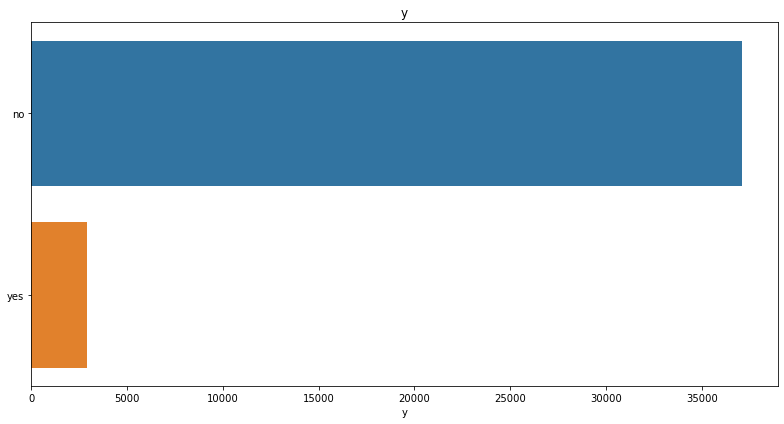

In [18]:
categori=['job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'y']
for col in categori:
    plt.figure(figsize=(11,6))
    sns.barplot(data[col].value_counts(),data[col].value_counts().index,data=data)
    plt.title(col)
    plt.tight_layout()

## Giriş Kategorik özellik Gözlem
1) Job - Daha Fazla İş türü Admin , Teknisyen ve mavi yakadır ve yüksek maaşlı kişileri hedefleyen banka anlamına gelir.

2) Marital - daha fazla evli tip - (#Yapılacak - Yüksek maaşlı evli insanlar için hedef değer dağılımını kontrol edin)

3) Education - üniversitede daha fazla kişi var. Elbette yüksek maaşlı kişilerden üniversite diploması beklenmelidir. Ve okuma yazma bilmeyen sayısı çok azdır.

4) Default - çoğu kişinin kredi temerrüdü yoktur, bu da onların yaklaşabilecekleri anlamına gelir.

5) Housing - Hiç konut kredisi almamış kişilere daha fazla önem vermeliyiz.

6) Loan - Personel kredisi almamış kişilere daha fazla önem vermeliyiz.

7) Month - Portekizce'de mayıs yoğun bir mevsim gibi görünüyor

8) Day - Her gün yoğun görünüyor ama hafta sonları değil.


### Hedef Değişkenlerle ilişkili değişkenleri kategorilere ayıralım

In [19]:
from scipy import stats

# öncelikle mesleklere göre hangi meslek grubunda olanların daha çok vadeli hesap açmış olabileceğini bulalım.
data.groupby(['job','y']).y.count()

job            y  
admin          no     4132
               yes     351
blue-collar    no     8848
               yes     535
entrepreneur   no     1317
               yes      88
housemaid      no     1034
               yes      53
management     no     7490
               yes     676
retired        no     1286
               yes     151
self-employed  no     1302
               yes     112
services       no     3672
               yes     238
student        no      442
               yes      82
technician     no     6355
               yes     497
unemployed     no     1008
               yes      96
unknown        no      218
               yes      17
Name: y, dtype: int64

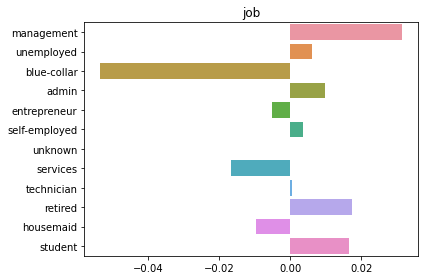

In [20]:
# burada yaptığımız müşterinin işi ile hesap açıp açmadığı arasındaki bağlantıyı
# diğer değişkenler yardımıyla hesaplatmak olacaktır.

# karşılaştırma yaptığımız müşterinin yapığı işe göre görselleştirmek
feature_name = 'job'


pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts()
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()

all_counts = list(set(list(pos_counts.index)+list(neg_counts.index)))

# ne kadar aralıkla tekrar ettiğini bulalım
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()

pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()

all_index = list(all_counts)
all_counts = [
    pos_counts.get(k, 0)/freq_pos - neg_counts.get(k, 0)/freq_neg
    for k in all_counts
]


sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

Pozitif değerler, bu kategorinin abone olacak müşterileri desteklediğini ve negatif değerler kategorilerinin satın almamayı tercih ettiğini ima eder.

In [21]:
data.groupby(['marital','y']).y.count()

marital   y  
divorced  no      4334
          yes      391
married   no     22908
          yes     1478
single    no      9862
          yes     1027
Name: y, dtype: int64

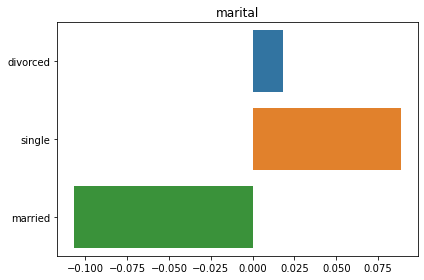

In [22]:
feature_name = 'marital'


pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts()
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()

all_counts = list(set(list(pos_counts.index)+list(neg_counts.index)))

freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()

pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()

all_index = list(all_counts)
all_counts = [
    pos_counts.get(k, 0)/freq_pos - neg_counts.get(k, 0)/freq_neg
    for k in all_counts
]


sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [23]:
data.groupby(['job','marital','y']).y.count()
# Ve Yönetici - evli insanlar Vadeli Mevduat ile daha fazla ilgileniyor.

job      marital   y  
admin    divorced  no      618
                   yes      62
         married   no     2178
                   yes     155
         single    no     1336
                          ... 
unknown  divorced  yes       1
         married   no      154
                   yes      11
         single    no       50
                   yes       5
Name: y, Length: 71, dtype: int64

In [24]:
data.groupby(['contact','y']).y.count()

contact    y  
cellular   no     22681
           yes     2233
telephone  no      2155
           yes      166
unknown    no     12268
           yes      497
Name: y, dtype: int64

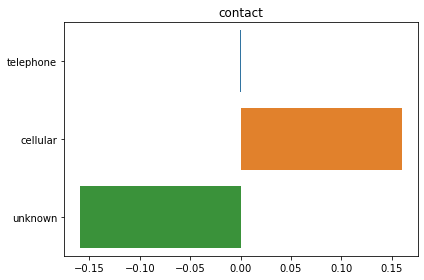

In [25]:
feature_name = 'contact'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [26]:
data.groupby(['day','y']).age.count()

day  y  
1    no      136
     yes      40
2    no     1005
     yes     104
3    no      794
            ... 
29   yes      49
30   no     1233
     yes     224
31   no      565
     yes      26
Name: age, Length: 62, dtype: int64

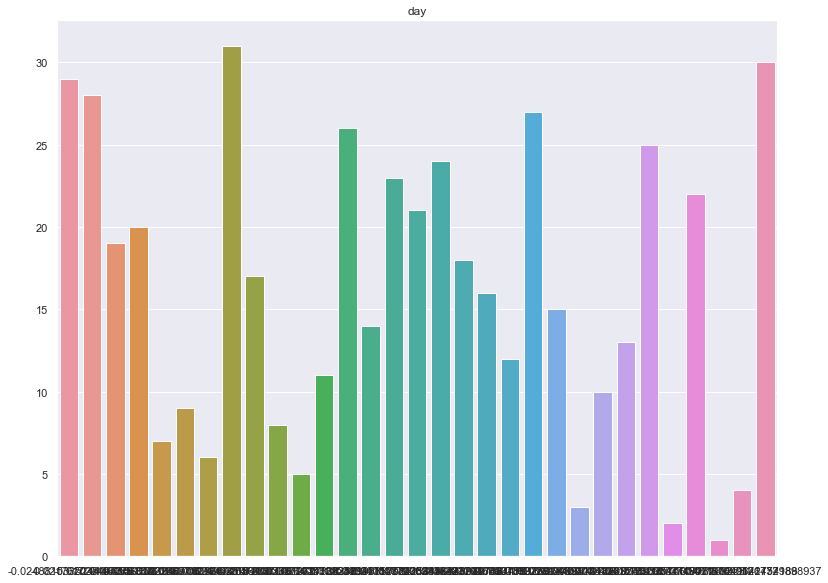

In [27]:
feature_name = 'day'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [28]:
data.groupby(['loan','y']).age.count()

loan  y  
no    no     30554
      yes     2516
yes   no      6550
      yes      380
Name: age, dtype: int64

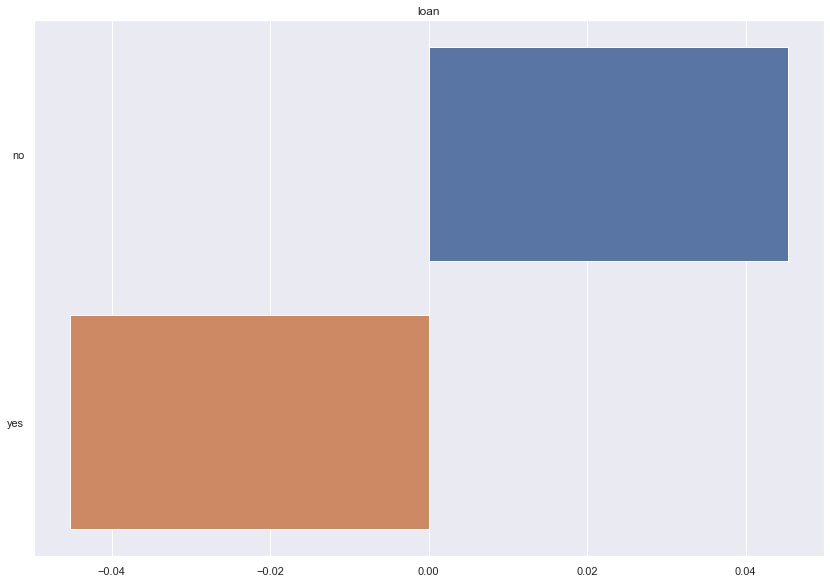

In [29]:
feature_name = 'loan'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [30]:
data.groupby(['default','y']).age.count()

default  y  
no       no     36344
         yes     2847
yes      no       760
         yes       49
Name: age, dtype: int64

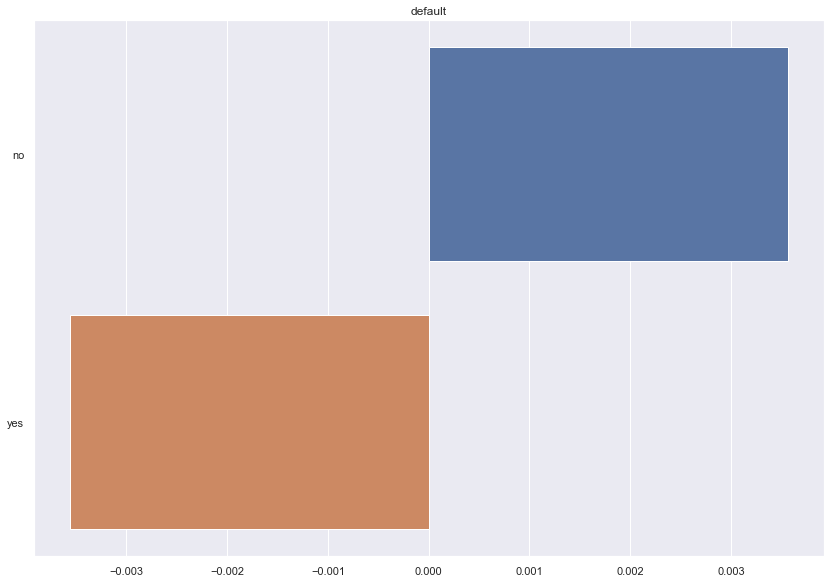

In [31]:
feature_name = 'default'


pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [32]:
data.groupby(['housing','y']).age.count()

housing  y  
no       no     14537
         yes     1432
yes      no     22567
         yes     1464
Name: age, dtype: int64

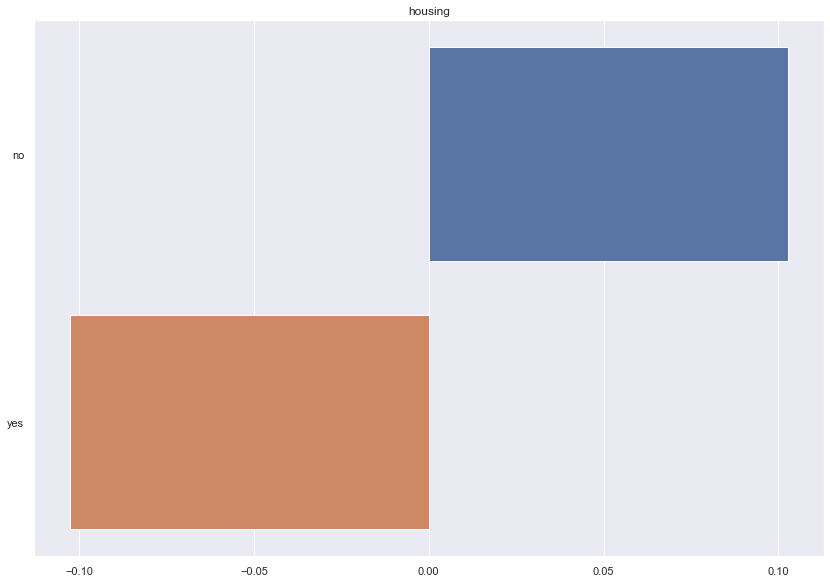

In [33]:
feature_name = 'housing'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [34]:
data.groupby(['month','y']).age.count()

month  y  
apr    no      2267
       yes      451
aug    no      4927
       yes      288
dec    no        12
       yes        1
feb    no      2041
       yes      255
jan    no      1138
       yes       38
jul    no      5996
       yes      384
jun    no      4440
       yes      294
mar    no       133
       yes      125
may    no     12741
       yes      791
nov    no      3378
       yes      220
oct    no        31
       yes       49
Name: age, dtype: int64

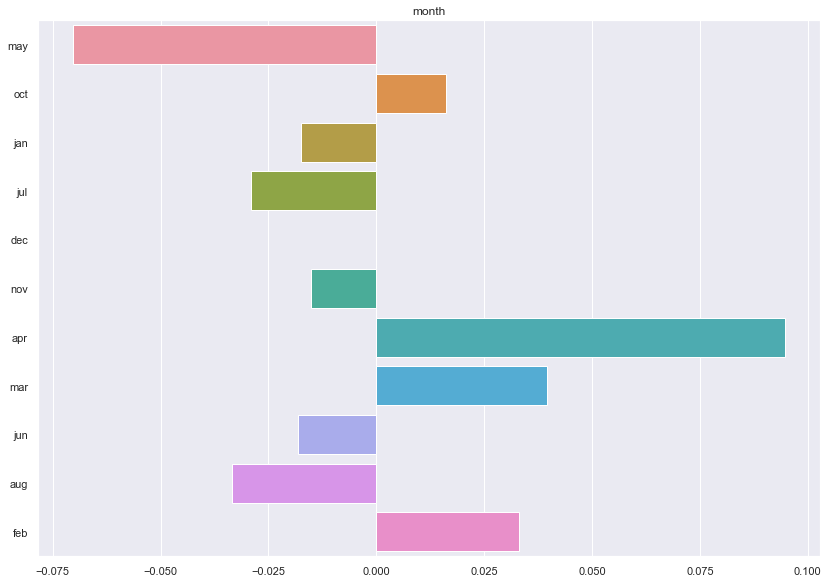

In [35]:
feature_name = 'month'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

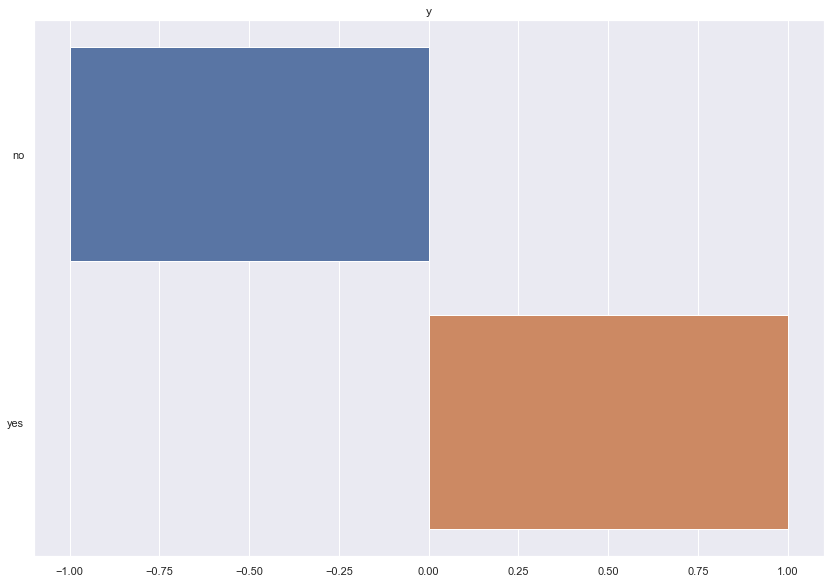

In [36]:
feature_name = 'y'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

## Çıkarım/Sonuç

1) Veri kümesinde birçok değişken için bilinmeyen değerler var. Eksik verileri işlemenin birçok yolu vardır. Yollardan biri satırı atmaktır, ancak bu veri kümesinin azalmasına yol açacaktır ve bu nedenle doğru ve gerçekçi bir tahmin modeli oluşturma amacımıza hizmet etmeyecektir.

2) Diğer yöntem, bilinmeyen değişkenin değerini diğer değişkenlerden akıllıca çıkarmaktır. Bu, eksik değişkenin değerini çıkarmak için diğer bağımsız değişkenleri kullandığımız bir atama yapmanın bir yoludur. Bu, tüm eksik değerlerin ele alınacağını garanti etmez, ancak çoğunun tahminde faydalı olabilecek makul bir değeri olacaktır.

3) Değeri bilinmeyen/eksik olan değişkenler: 'eğitim', 'iş', 'konut', 'kredi', 'sağır' ve 'evlilik'. Ama önemli olanlar 'eğitim', 'iş', 'konut' ve 'kredi'. 'Evlilik' için bilinmeyenlerin sayısı çok düşük. 'Varsayılan' değişken için bilinmeyen, bilinmeyen olarak kaydedildiği kabul edilir. Müşterinin bu bilgileri bankacılık temsilcisine açıklamak istememesi mümkün olabilir. Dolayısıyla 'varsayılan'daki bilinmeyen değer aslında ayrı bir değerdir.

4) Bu nedenle 'eğitim', 'iş', 'konut' ve 'kredi'de bilinmeyen değerler için yeni değişkenler oluşturarak başlıyoruz. Bunu değerlerin rastgele olup olmadığını veya eksik değerlerde bir kalıp olup olmadığını görmek için yapıyoruz.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
y = data[['y']]
X = data.drop(['y'], axis=1)
#y = data['y'].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
X_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign'],
      dtype='object')

In [41]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign'],
      dtype='object')

In [42]:
y_train.head()

,y
38015,no
2281,no
36629,no
6087,no
11792,no


In [43]:
y_test.head()

,y
32823,no
16298,no
28505,no
6689,no
26893,no


Eğitim ve test verilerinin dağıtımı

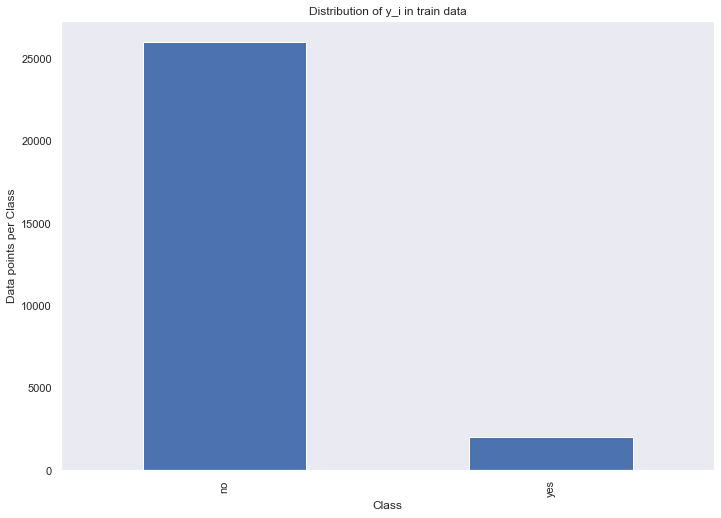

Number of data points in class 1 : 25976 ( 92.771 %)
Number of data points in class 2 : 2024 ( 7.229 %)
--------------------------------------------------------------------------------


In [44]:
def plot_distribution(class_distribution,title,xlabel,ylabel):
    class_distribution.plot(kind='bar')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()


# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train['y'].value_counts()
test_class_distribution = y_test['y'].value_counts()


plot_distribution(train_class_distribution,
                 'Distribution of y_i in train data',
                 'Class',
                 'Data points per Class')

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], 
          '(', np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3), '%)')
    
print('-'*80)

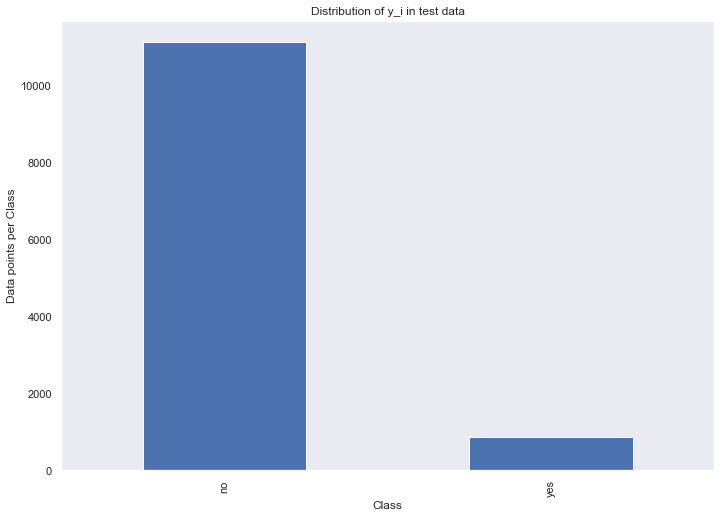

Number of data points in class 1 : 11128 ( 92.733 %)
Number of data points in class 2 : 872 ( 7.267 %)
--------------------------------------------------------------------------------


In [45]:
plot_distribution(test_class_distribution,
                 'Distribution of y_i in test data',
                 'Class',
                 'Data points per Class')

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(test_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], 
          '(', np.round((test_class_distribution.values[i]/X_test.shape[0]*100), 3), '%)')

print('-'*80)

In [46]:
data = pd.concat([X_train, y_train], axis=1)

In [47]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y
38015,30,entrepreneur,single,tertiary,no,303,yes,no,cellular,14,may,2,no
2281,34,entrepreneur,single,tertiary,no,714,yes,no,unknown,12,may,4,no
36629,24,blue-collar,married,secondary,no,1470,yes,no,cellular,12,may,1,no
6087,43,management,single,secondary,no,109,yes,no,unknown,27,may,3,no
11792,35,blue-collar,married,primary,no,14,yes,no,unknown,20,jun,1,no


In [48]:
data_1= pd.concat([X_test, y_test], axis=1)

In [49]:
data_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y
32823,48,management,divorced,tertiary,no,266,yes,no,cellular,17,apr,2,no
16298,53,retired,divorced,secondary,no,84,no,no,cellular,23,jul,1,no
28505,43,management,divorced,tertiary,no,3578,no,no,cellular,29,jan,2,no
6689,38,technician,married,secondary,no,133,yes,no,unknown,28,may,1,no
26893,42,management,married,tertiary,no,4014,yes,no,cellular,21,nov,4,no


## Atama
Şimdi, 'iş' ve 'eğitim'deki eksik değerleri çıkarmak için, 'iş' ve 'eğitim' arasındaki çapraz tablodan yararlanıyoruz. Buradaki hipotezimiz, 'iş'in bir kişinin 'eğitiminden' etkilendiğidir. Dolayısıyla, kişinin eğitimine dayanarak 'iş' çıkarabiliriz. Ayrıca, sadece eksik değerleri doldurduğumuz için nedensel çıkarımla fazla ilgilenmiyoruz. Bu nedenle, işi eğitimi tahmin etmek için kullanabiliriz.

In [50]:
def cross_tab(data,f1,f2):
    # find no of unique values in jobs colums
    jobs=list(data[f1].unique())
    # find no of unique values in education columns
    edu=list(data[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=data[data[f2]==e]
        # https://www.youtube.com/watch?v=qy0fDqoMJx8 for groupby operation
        #https://www.youtube.com/watch?v=hfDXRyYIFkk grupby count
        #https://data36.com/pandas-tutorial-2-aggregation-and-grouping/
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
        #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [51]:
cross_tab(data,'job','education')

,tertiary,secondary,primary,unknown
job,,,,
admin,279,2636,133,97
blue-collar,85,3578,2532,311
entrepreneur,444,349,116,57
housemaid,102,258,391,29
management,4726,721,193,135
retired,172,464,357,45
self-employed,491,384,88,22
services,117,2303,245,99
student,98,196,17,53


İşlerden eğitim çıkarımı : Çapraz tablodan, yöneticilik işlerine sahip kişilerin genellikle üniversite diplomasına sahip oldukları görülebilir. Dolayısıyla 'iş' = yönetim ve 'eğitim' = bilinmeyen olduğunda, 'eğitim' yerine 'university.degree' koyabiliriz. Benzer şekilde, 'iş' = 'hizmetler' --> 'eğitim' = 'lise' ve 'iş' = 'hizmetçi' --> 'eğitim' = 'temel.4y'.

Eğitimden meslek çıkarımı : Eğer 'eğitim' = 'basic.4y' veya 'basic.6y' veya 'basic.9y' ise 'iş' genellikle 'mavi yakalı' olur. 'Eğitim' = 'profesyonel.kurs' ise, 'iş' = 'teknisyen'.

İş ve eğitim için değerleri yüklerken, korelasyonların gerçek dünyayı anlamlı hale getirmesi gerektiğinin farkındaydık. Gerçek dünyaya anlam ifade etmiyorsa, eksik değerleri değiştirmedik.

In [52]:
data['job'][data['age']>60].value_counts()

retired          109
management        13
housemaid         12
technician         7
blue-collar        7
self-employed      4
admin              3
unknown            3
Name: job, dtype: int64

Yaştan çıkarsama işleri: Gördüğümüz gibi, eğer 'yaş' > 60 ise, o zaman 'iş' 'emekli'dir, bu mantıklıdır.

In [53]:
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'tertiary'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'secondary'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'primary'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.4y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.6y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.9y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='professional.course'), 'job'] = 'technician'

In [54]:
cross_tab(data,'job','education')

,tertiary,secondary,primary,unknown
admin,279,2636,133,97.0
blue-collar,85,3578,2532,311.0
entrepreneur,444,349,116,57.0
housemaid,102,258,420,0.0
management,4861,721,193,0.0
retired,173,465,357,46.0
self-employed,491,384,88,22.0
services,117,2402,245,0.0
student,98,196,17,53.0
technician,1183,3308,109,158.0


Gördüğümüz gibi, bilinmeyenlerin sayısını azaltabiliyor ve veri setimizi geliştirebiliyoruz.

## ithamlar
Ev ve kredi için isnat : Yine 'ev' ve 'iş' ve 'kredi' ve 'iş' arasındaki çapraz tabloları kullanıyoruz. Hipotezimiz, konut kredisi statüsünün (Evet veya Hayır) her iş kategorisine göre orantılı olması gerektiğidir. Bu nedenle, her iş kategorisi için konut kredisinin önceden bilinen dağılımı kullanılarak, bilinmeyen kişiler için konut kredisi, önceki dağılım (% Ev = Her iş kategorisi için Evet ve Hayır'lar aynı kalacak şekilde) tahmin edilecektir. Benzer şekilde 'loan' değişkenindeki eksik değerleri de doldurduk.

In [55]:
jobhousing=cross_tab(data,'job','housing')
print(jobhousing)

                yes    no
job                      
admin          2034  1111
blue-collar    4804  1702
entrepreneur    594   372
housemaid       267   513
management     3104  2671
retired         323   718
self-employed   525   460
services       1923   841
student         167   197
technician     2707  2051
unemployed      354   402
unknown          18   142


In [56]:
def fillhousing(data,jobhousing):
    """Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        #Here we are taking value in which housing is unknow and job value is known
        ind=data[np.logical_and(np.array(data['housing']=='unknown'),np.array(data['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        data.loc[ind1,"housing"]='no'
        data.loc[ind2,"housing"]='yes'
    return data

In [57]:
data=fillhousing(data,jobhousing)

In [58]:
jobhousing=cross_tab(data,'job','housing')
print(jobhousing)

                yes    no
job                      
admin          2034  1111
blue-collar    4804  1702
entrepreneur    594   372
housemaid       267   513
management     3104  2671
retired         323   718
self-employed   525   460
services       1923   841
student         167   197
technician     2707  2051
unemployed      354   402
unknown          18   142


### Kişisel kredi ve kredi için izafi

In [59]:
jobloan=cross_tab(data,'job','loan')
print(jobloan)

                 no   yes
job                      
admin          2500   645
blue-collar    5360  1146
entrepreneur    734   232
housemaid       677   103
management     4960   815
retired         822   219
self-employed   822   163
services       2203   561
student         356     8
technician     3894   864
unemployed      686    70
unknown         156     4


In [60]:
def fillloan(data,jobloan):
    """Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=data[np.logical_and(np.array(data['loan']=='unknown'),np.array(data['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        data.loc[ind1,"loan"]='no'
        data.loc[ind2,"loan"]='yes'
    return data

In [61]:
data=fillloan(data,jobloan)

In [62]:
jobloan=cross_tab(data,'job','loan')
print(jobloan)

                 no   yes
job                      
admin          2500   645
blue-collar    5360  1146
entrepreneur    734   232
housemaid       677   103
management     4960   815
retired         822   219
self-employed   822   163
services       2203   561
student         356     8
technician     3894   864
unemployed      686    70
unknown         156     4


### Sayısal değişkenler
Sayısal değişkenleri anlamak için verilerin özetini görelim

In [63]:
numerical_variables = ['age','campaign']
data[numerical_variables].describe()

,age,campaign
count,28000.000000,28000.000000
mean,40.613321,2.884286
std,9.680463,3.277912
min,19.000000,1.000000
25%,33.000000,1.000000
50%,39.000000,2.000000
75%,48.000000,3.000000
max,94.000000,58.000000


Eksik Değerler: Veri kaynağından (U.C. Irvine ML Deposu), eksik değerlerin veya NaN'lerin '999' olarak kodlandığı söylendi. Yukarıdaki tablodan sadece 'pdays' değerlerinin eksik olduğu açıktır. Ayrıca, 'pdays' değerlerinin çoğu eksik.

In [64]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y
38015,30,entrepreneur,single,tertiary,no,303,yes,no,cellular,14,may,2,no
2281,34,entrepreneur,single,tertiary,no,714,yes,no,unknown,12,may,4,no
36629,24,blue-collar,married,secondary,no,1470,yes,no,cellular,12,may,1,no
6087,43,management,single,secondary,no,109,yes,no,unknown,27,may,3,no
11792,35,blue-collar,married,primary,no,14,yes,no,unknown,20,jun,1,no


In [65]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'y'],
      dtype='object')

## Denge

<AxesSubplot:xlabel='y', ylabel='count'>

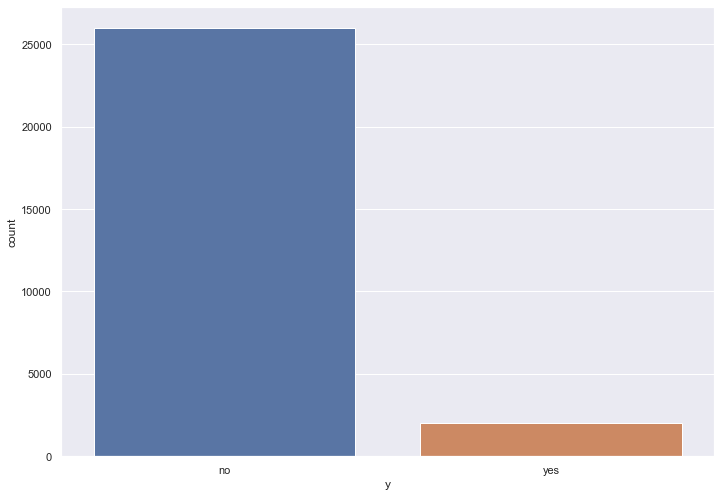

In [66]:
sns.countplot(x='y',data=data)

Verilerin çok çarpık olduğunu görebiliriz, bu yüzden 'evet'e karşılık gelen demetleri çoğaltıyoruz.

In [67]:
d1=data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

<AxesSubplot:xlabel='y', ylabel='count'>

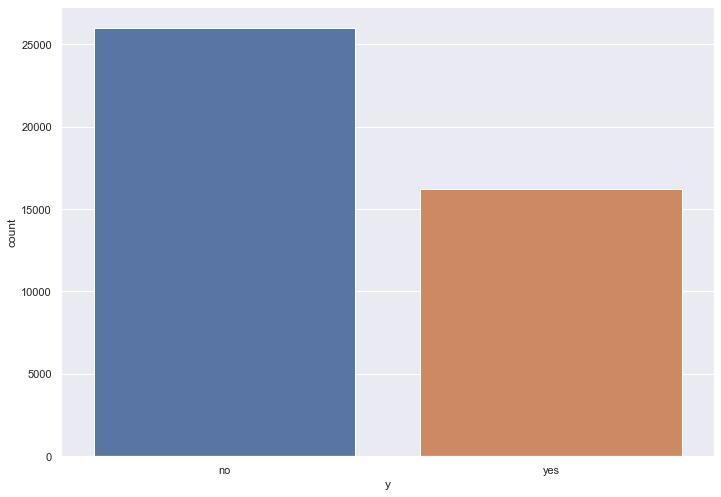

In [68]:
sns.countplot(x='y',data=data)

Sayısal Değişkenlerde Eksik Değerler
'pdays' de eksik olan değerleri inceleyelim

## Sayısal Değişkenlerde Eksik Değerler

'day' verilerinde eksik olanları inceleyelim

In [69]:
def drawhist(data,feature):
    plt.hist(data[feature])

Bilinen değerlerin dağılımını doğru bir şekilde anlamak için değerlerin histogramını çizerken, aralık dışı bir değerle kodlanmış eksik değerler filtrelendi. Burada histogramlar matplotlib kullanılarak oluşturulmuştur.

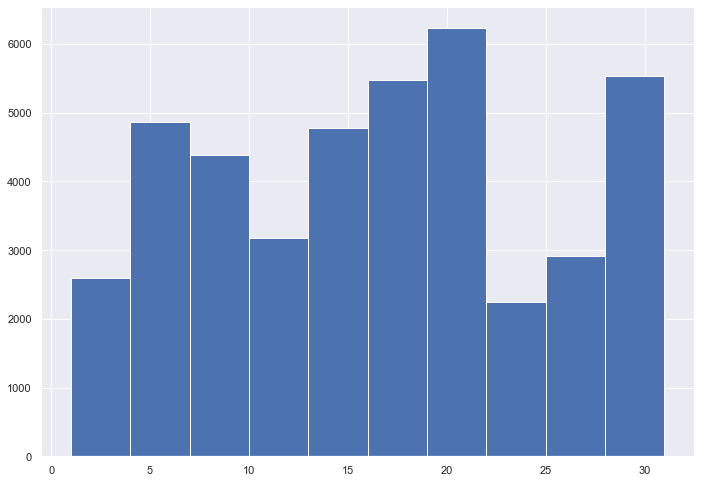

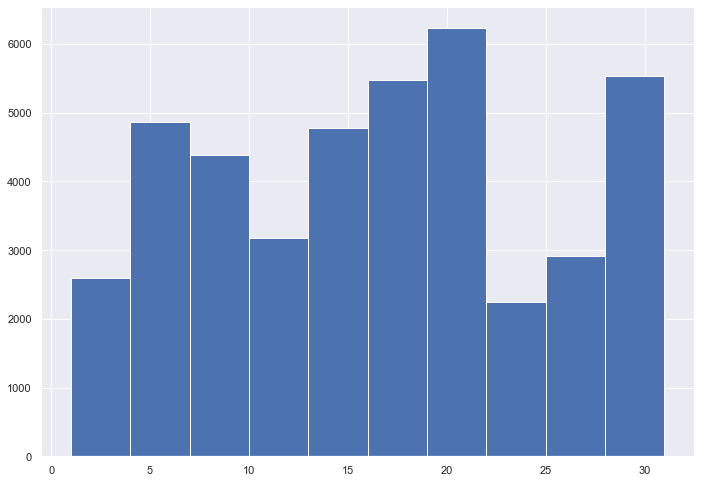

In [70]:
drawhist(data,'day')
plt.show()

plt.hist(data.loc[data.day != 999, 'day'])
plt.show()

In [71]:
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html
#Compute a simple cross-tabulation of two (or more) factors
pd.crosstab(data['day'],data['campaign'], values=data['age'], aggfunc='count', normalize=True)

campaign,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,41,43,44,50,51,58
day,,,,,,,,,,,,,,,,,,,,,
1,0.005336,0.002063,0.000213,0.000285,0.000000,0.000000,0.000000,0.000000,0.000190,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.015296,0.007470,0.003818,0.001565,0.000996,0.000285,0.000213,0.000166,0.000142,0.000024,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.009960,0.006190,0.002490,0.001779,0.000617,0.000759,0.000545,0.000071,0.000119,0.000095,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.012450,0.010031,0.004482,0.002893,0.001589,0.001541,0.000403,0.000285,0.000024,0.000071,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.018047,0.011525,0.004031,0.001494,0.000901,0.000427,0.000617,0.000356,0.000142,0.000285,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.015699,0.013778,0.006047,0.003367,0.001233,0.000949,0.000403,0.000308,0.000356,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.013162,0.011359,0.005194,0.003035,0.001423,0.000474,0.000213,0.000237,0.000261,0.000024,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.014371,0.011881,0.004790,0.002680,0.001115,0.000545,0.000213,0.000261,0.000119,0.000024,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.013826,0.007565,0.004174,0.002371,0.001731,0.001020,0.000403,0.000119,0.000166,0.000142,...,0.000000,0.000024,0.000000,0.000000,0.000000,0.000024,0.000000,0.000000,0.000000,0.000000


In [72]:
#creating a new column named "day2" based on the value in "day2" column 
def function (row):
    if(row['day']==999):
        return 0;
    return 1;
data['day2']=data.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['day']==999):
        return 30;
    return row['day'];
data['day']=data.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
data['day']=data['day'].astype(int)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y,day2
38015,30,entrepreneur,single,tertiary,no,303,yes,no,cellular,14,may,2,no,1
2281,34,entrepreneur,single,tertiary,no,714,yes,no,unknown,12,may,4,no,1
36629,24,blue-collar,married,secondary,no,1470,yes,no,cellular,12,may,1,no,1
6087,43,management,single,secondary,no,109,yes,no,unknown,27,may,3,no,1
11792,35,blue-collar,married,primary,no,14,yes,no,unknown,20,jun,1,no,1


Yukarıdaki tablodan da görebileceğimiz gibi, 'pdays' değerlerinin çoğu eksik. Bu eksik değerlerin çoğu, 'poutcome' 'yok' olduğunda ortaya çıkar. Bu, müşteriyle daha önce hiç iletişime geçilmediği için 'pdays' içindeki değerlerin çoğunun eksik olduğu anlamına gelir. Bu değişkenle başa çıkmak için 'pdays' sayısal değişkenini kaldırdık ve onun yerine şu kategorilere sahip kategorik değişkenler koyduk: pdays,pdays2

### Aykırı Değer Kontrol

#### Aykırı Değerler

Outliers are defined as 1.5 x Q3 value (75th percentile). From the above table, it can be seen that only 'age' and 'campaign' have outliers as max('age') and max('campaign') > 1.5Q3('age') and >1.5Q3('campaign') respectively.

<AxesSubplot:>

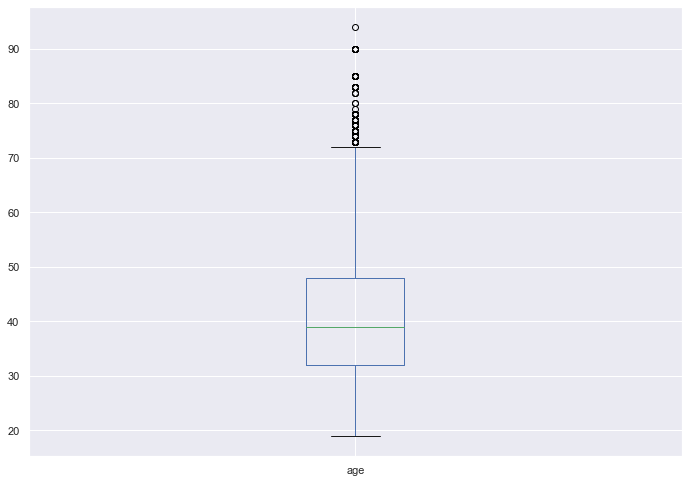

In [73]:
# Check outlier if any for Numberic column.
data.age.plot(kind='box')
# There are outlier and check max age and age greated than 90

In [74]:
print(data.age.max())
data[data['age'] > 80].head(5)

94


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y,day2
31395,83,retired,divorced,primary,no,46,no,no,cellular,25,mar,1,yes,1
31089,82,retired,married,tertiary,no,278,no,no,cellular,16,feb,7,no,1
31233,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,1,no,1
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,1,no,1
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,2,no,1


<AxesSubplot:ylabel='Frequency'>

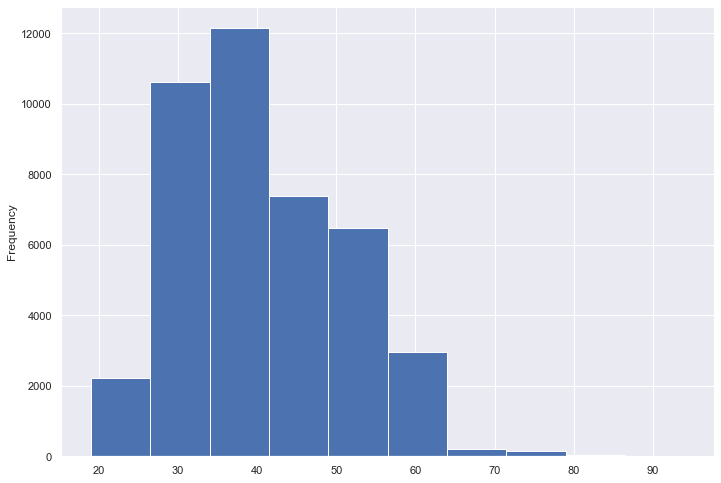

In [75]:
data.age.plot(kind='hist')
# it is bit positively skewed but it is ok and seems no high dependency with Output variable

<AxesSubplot:ylabel='Density'>

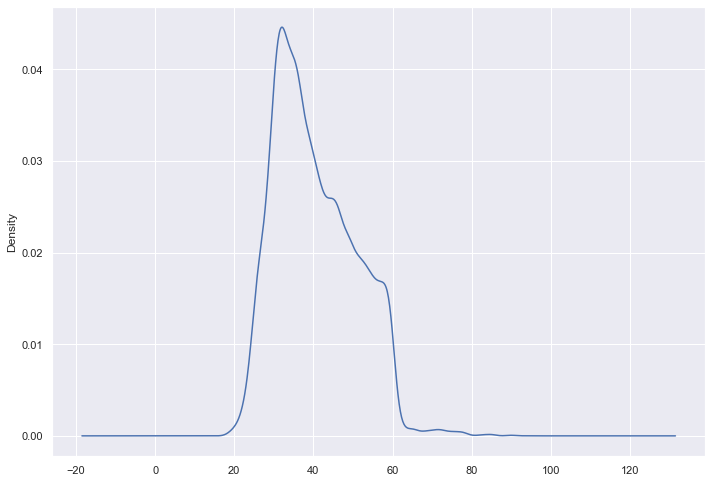

In [76]:
data.age.plot(kind='kde')

In [77]:
# Create Binning for all numeric fields base on Box plot quantile
def binning(dataframe,featureName):
    print (featureName)
    q1 = dataframe[featureName].quantile(0.25)
    q2 = dataframe[featureName].quantile(0.50)
    q3 = dataframe[featureName].quantile(0.75)
    dataframe.loc[(dataframe[featureName] <= q1), featureName] = 1
    dataframe.loc[(dataframe[featureName] > q1) & (dataframe[featureName] <= q2), featureName] = 2
    dataframe.loc[(dataframe[featureName] > q2) & (dataframe[featureName] <= q3), featureName] = 3
    dataframe.loc[(dataframe[featureName] > q3), featureName] = 4 
    print (q1, q2, q3)

In [78]:
binning(data,'age')

age
32.0 39.0 48.0


### özellik kampanyası için anahat kontrolü#### 

<AxesSubplot:ylabel='Frequency'>

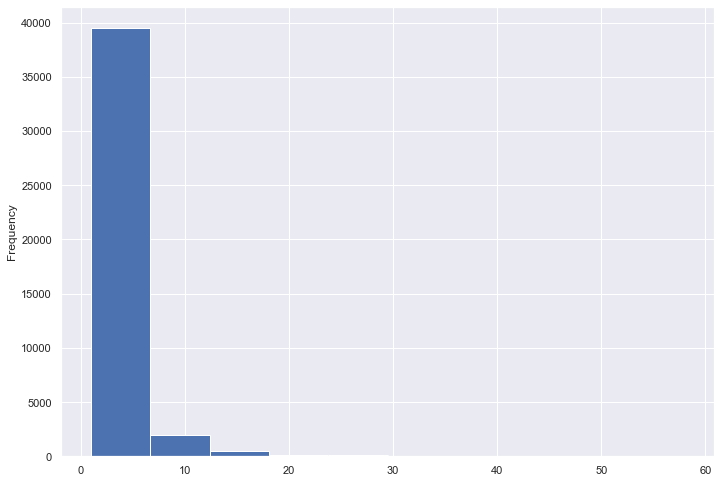

In [79]:
# let check campaign field now and it is positively skewed..
data.campaign.plot(kind='hist')

<AxesSubplot:>

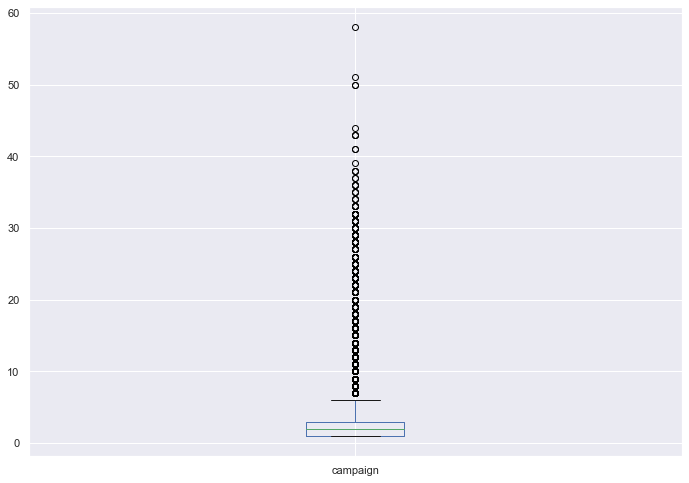

In [80]:
data.campaign.plot(kind='box')
# lot of exreme values.

In [81]:
print(data.campaign.max())
print(data.campaign.mean())
print(data.campaign.median())
print(data.campaign.unique())
print('Y=1 for campaign > 10' , data[(data['campaign'] > 10) & (data['y'] ==1)].age.count())
print('Y=1 for campaign < 10' , data[(data['campaign'] <= 10) & (data['y'] ==1)].age.count())
print('Y=1 for campaign = 1' , data[(data['campaign'] == 1) & (data['y'] ==1)].age.count())

58
2.724957313602732
2.0
[ 2  4  1  3  7  5  6 18 10 22 16 11  8  9 30 13 15 17 12 39 14 36 23 20
 21 29 25 32 19 27 24 31 28 33 43 26 35 41 38 50 58 44 34 37 51]
Y=1 for campaign > 10 0
Y=1 for campaign < 10 0
Y=1 for campaign = 1 0


In [82]:
data.groupby(['campaign','y']).y.count()

campaign  y  
1         no     9453
          yes    6944
2         no     7286
          yes    4264
3         no     3260
                 ... 
43        no        3
44        no        1
50        no        2
51        no        1
58        no        1
Name: y, Length: 65, dtype: int64

In [83]:
data['campaign'].describe()

count    42168.000000
mean         2.724957
std          2.981250
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: campaign, dtype: float64

In [84]:
q1 = data['campaign'].quantile(0.25)
q2 = data['campaign'].quantile(0.50)
q3 = data['campaign'].quantile(0.75)

print(q1)
print(q2)
print(q3)

iqr = q3-q1 #Interquartile range

extreme_low_campaign = q1-1.5*iqr
extreme_high_capmaign = q3+1.5*iqr

print (extreme_low_campaign)
print (extreme_high_capmaign)

1.0
2.0
3.0
-2.0
6.0


In [85]:
binning(data,'campaign')

campaign
1.0 2.0 3.0


In [86]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y,day2
38015,1,entrepreneur,single,tertiary,no,303,yes,no,cellular,14,may,2,no,1
2281,2,entrepreneur,single,tertiary,no,714,yes,no,unknown,12,may,4,no,1
36629,1,blue-collar,married,secondary,no,1470,yes,no,cellular,12,may,1,no,1
6087,3,management,single,secondary,no,109,yes,no,unknown,27,may,3,no,1
11792,2,blue-collar,married,primary,no,14,yes,no,unknown,20,jun,1,no,1


### Verileri Standartlaştırma

In [87]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'y', 'day2'],
      dtype='object')

In [88]:

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y,day2
38015,1,entrepreneur,single,tertiary,no,303,yes,no,cellular,14,may,2,no,1
2281,2,entrepreneur,single,tertiary,no,714,yes,no,unknown,12,may,4,no,1
36629,1,blue-collar,married,secondary,no,1470,yes,no,cellular,12,may,1,no,1
6087,3,management,single,secondary,no,109,yes,no,unknown,27,may,3,no,1
11792,2,blue-collar,married,primary,no,14,yes,no,unknown,20,jun,1,no,1


In [89]:
#idx_numeric=[0,10,11,12,14,15,16,17,18]
#scaler = preprocessing.StandardScaler().fit(X_train)
#data[data.columns[idx_numeric]] = scaler.fit_transform(data[data.columns[idx_numeric]])

## Kategorik değişkenler Sıralı veya Nominal olabilir

In [90]:
#data['campaign'] = data['campaign'].map({'failure': -1,'nonexistent': 0,'success': 1})
data['default'] = data['default'].map({'yes': -1,'unknown': 0,'no': 1})
data['housing'] = data['housing'].map({'yes': -1,'unknown': 0,'no': 1})
data['loan'] = data['loan'].map({'yes': -1,'unknown': 0,'no': 1})

## Nominal Değişkenleri İşleme (One Hot Encoding)

'job', 'maritial', 'education', 'contact', 'month', 'day' are Nominal Variables

In [91]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month','day']
data_clean = pd.get_dummies(data,columns=nominal)
data_clean['y']=data_clean['y'].map({'yes': 1,'no': 0})
data_clean.head()

,age,default,balance,housing,loan,campaign,y,day2,job_admin,job_blue-collar,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
38015,1,1,303,-1,1,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2281,2,1,714,-1,1,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
36629,1,1,1470,-1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6087,3,1,109,-1,1,3,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
11792,2,1,14,-1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [92]:
data_clean.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'campaign', 'y', 'day2',
       'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12',
       'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_2

In [93]:
data_clean.shape

(42168, 72)

In [94]:
df_with_dummies=pd.get_dummies(data_clean)

In [95]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

In [96]:
features_dropped = ['marital_single','contact_cellular',
                    'education_unknown','job_unknown',
     'marital_single','contact_cellular',
                    'education_unknown']
data_clean = dropfeature(df_with_dummies, features_dropped)

# Sayısal alanlar için grafikler çizerek veri dağılımını analiz etme

In [97]:
data_clean.describe()

,age,default,balance,housing,loan,campaign,y,day2,job_admin,job_blue-collar,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
count,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.0,42168.000000,42168.000000,...,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000
mean,2.440500,0.959827,1377.916785,-0.128107,0.681939,2.161853,0.383988,1.0,0.114423,0.213883,...,0.022932,0.020655,0.009486,0.020015,0.022837,0.026181,0.035904,0.031967,0.051129,0.012213
std,1.110948,0.280595,2915.134052,0.991772,0.731418,1.157713,0.486361,0.0,0.318328,0.410050,...,0.149689,0.142230,0.096934,0.140054,0.149386,0.159675,0.186053,0.175915,0.220263,0.109837
min,1.000000,-1.000000,-6847.000000,-1.000000,-1.000000,1.000000,0.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,81.000000,-1.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,466.000000,-1.000000,1.000000,2.000000,0.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1469.250000,1.000000,1.000000,3.000000,1.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,1.000000,102127.000000,1.000000,1.000000,4.000000,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
data_clean.head()

,age,default,balance,housing,loan,campaign,y,day2,job_admin,job_blue-collar,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
38015,1,1,303,-1,1,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2281,2,1,714,-1,1,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
36629,1,1,1470,-1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6087,3,1,109,-1,1,3,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
11792,2,1,14,-1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [99]:
data_clean.shape

(42168, 68)

In [100]:
data_clean.corr()
# Input feature - nr.employed and  euribor3m (.94) and emp.var.rate and nr.employed (.90) 
#and euribor3m and emp.var.rate (.97) are more correlated and we can remove on column.
# And lets Remove columns - euribor3m and emp.var.rate

,age,default,balance,housing,loan,campaign,y,day2,job_admin,job_blue-collar,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
age,1.000000,0.007471,0.064880,0.134968,0.001692,0.042881,-0.058839,NaN,-0.048176,-0.007646,...,0.001289,-0.021864,0.012949,-0.013380,-0.036753,-0.030389,-0.011693,0.005364,-0.005788,0.045894
default,0.007471,1.000000,0.073839,-0.014233,0.074556,0.003663,0.004601,NaN,0.010045,-0.012302,...,0.011771,0.006531,-0.017378,-0.001264,0.006046,0.006537,-0.006895,-0.003770,0.001770,-0.004087
balance,0.064880,0.073839,1.000000,0.051437,0.088250,-0.014635,0.052050,NaN,-0.038484,-0.049116,...,-0.011056,-0.001077,-0.007071,-0.001074,-0.000186,-0.003615,-0.036326,-0.016241,0.003423,0.000399
housing,0.134968,-0.014233,0.051437,1.000000,0.022422,0.050135,0.115356,NaN,-0.035522,-0.164541,...,0.079374,-0.031846,-0.011534,0.051583,0.018947,0.013093,0.026984,0.011240,0.068632,0.026772
loan,0.001692,0.074556,0.088250,0.022422,1.000000,-0.003059,0.057469,NaN,-0.037825,-0.028577,...,0.028931,-0.009340,-0.008956,-0.009158,0.011784,0.001450,-0.024477,0.000138,0.029991,-0.017770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
day_27,-0.030389,0.006537,-0.003615,0.013093,0.001450,0.023261,0.017125,NaN,0.025510,-0.031920,...,-0.025120,-0.023812,-0.016046,-0.023433,-0.025066,1.000000,-0.031642,-0.029796,-0.038061,-0.018232
day_28,-0.011693,-0.006895,-0.036326,0.026984,-0.024477,0.055816,-0.053820,NaN,-0.004099,-0.026988,...,-0.029565,-0.028026,-0.018885,-0.027579,-0.029502,-0.031642,1.000000,-0.035069,-0.044796,-0.021458
day_29,0.005364,-0.003770,-0.016241,0.011240,0.000138,0.018378,-0.079168,NaN,-0.003491,0.007458,...,-0.027840,-0.026391,-0.017783,-0.025970,-0.027781,-0.029796,-0.035069,1.000000,-0.042183,-0.020206
day_30,-0.005788,0.001770,0.003423,0.068632,0.029991,-0.044450,0.108943,NaN,0.011602,-0.052811,...,-0.035562,-0.033712,-0.022716,-0.033174,-0.035487,-0.038061,-0.044796,-0.042183,1.000000,-0.025811


In [101]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

Çıkarımlar: Yukarıdaki ısı haritasından 'y'nin (hedef değişkenimiz) 'önceki', 'emp.var.rate', 'euribor3m', 'nr.employed', 'pdays_missing', ' ile iyi bir korelasyona sahip olduğunu görebiliriz. poutcome_success' , 'poutcome_nonexistent' ve 'pdays_bet_5_15'. Modelleri oluştururken bu bağımsız değişkenleri önemli görmeyi bekliyoruz.

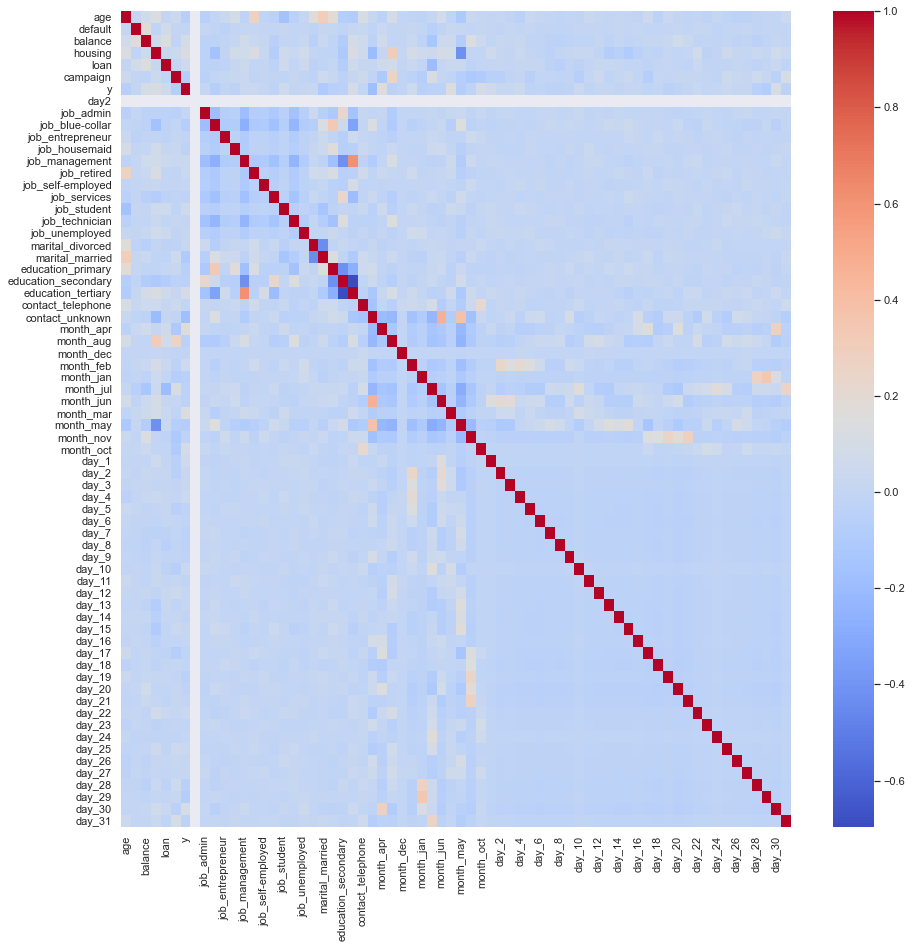

In [102]:
drawheatmap(data_clean)

## Test verilerini standartlaştırma

In [103]:
data_1= pd.concat([X_test, y_test], axis=1)

In [104]:
data_1.shape

(12000, 13)

In [105]:
data_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'y'],
      dtype='object')

Eğitim verilerinde gördüğümüz gibi, 'day' değerlerinin çoğu eksik. Bu eksik değerlerin çoğu, 'poutcome' 'yok' olduğunda ortaya çıkar. Bu, müşteriyle daha önce hiç iletişime geçilmediği için 'pdays' içindeki değerlerin çoğunun eksik olduğu anlamına gelir. Bu değişkenle başa çıkmak için 'pdays' sayısal değişkenini kaldırdık ve yerine şu kategorilere sahip kategorik değişkenler koyduk: 'pdays' ve 'pdays2'

# y Çıktısını Dengeleme

<AxesSubplot:xlabel='y', ylabel='count'>

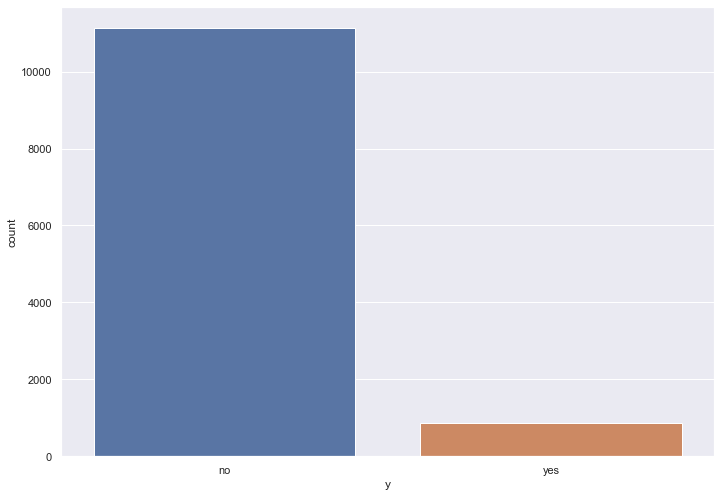

In [106]:
sns.countplot(x='y',data=data_1)

In [107]:

d1=data_1.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data_1=d1

<AxesSubplot:xlabel='y', ylabel='count'>

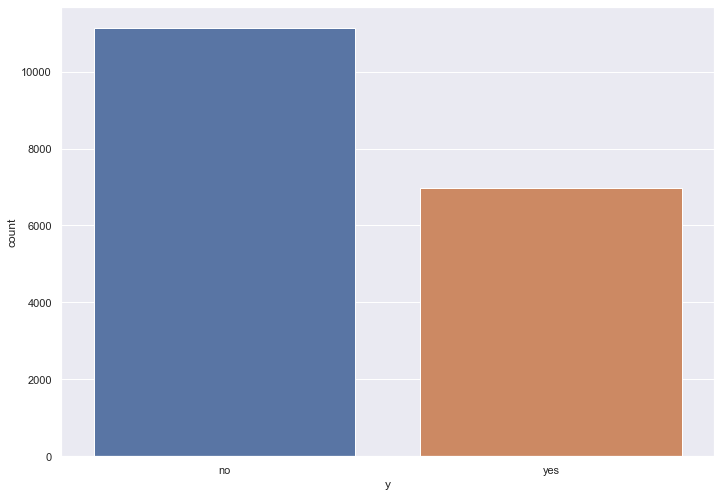

In [108]:
sns.countplot(x='y',data=data_1)

In [109]:
#creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['day']==999):
        return 0;
    return 1;
data_1['day2']=data_1.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['day']==999):
        return 30;
    return row['day'];
data_1['day']=data_1.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
data_1['day']=data_1['day'].astype(int)
data_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y,day2
32823,48,management,divorced,tertiary,no,266,yes,no,cellular,17,apr,2,no,1
16298,53,retired,divorced,secondary,no,84,no,no,cellular,23,jul,1,no,1
28505,43,management,divorced,tertiary,no,3578,no,no,cellular,29,jan,2,no,1
6689,38,technician,married,secondary,no,133,yes,no,unknown,28,may,1,no,1
26893,42,management,married,tertiary,no,4014,yes,no,cellular,21,nov,4,no,1


In [110]:
data_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'y', 'day2'],
      dtype='object')

In [111]:
#idx_numeric=[0,10,11,12,14,15,16,17,18]
#scaler = MinMaxScaler()
#data_1[data_1.columns[idx_numeric]] = scaler.fit_transform(data_1[data_1.columns[idx_numeric]])

In [112]:
data_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y,day2
32823,48,management,divorced,tertiary,no,266,yes,no,cellular,17,apr,2,no,1
16298,53,retired,divorced,secondary,no,84,no,no,cellular,23,jul,1,no,1
28505,43,management,divorced,tertiary,no,3578,no,no,cellular,29,jan,2,no,1
6689,38,technician,married,secondary,no,133,yes,no,unknown,28,may,1,no,1
26893,42,management,married,tertiary,no,4014,yes,no,cellular,21,nov,4,no,1


# Kategorik değişkenler Sıralı veya Nominal olabilir

In [113]:
#data_1['poutcome'] = data_1['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
data_1['default'] = data_1['default'].map({'yes': -1,'unknown': 0,'no': 1})
data_1['housing'] = data_1['housing'].map({'yes': -1,'unknown': 0,'no': 1})
data_1['loan'] = data_1['loan'].map({'yes': -1,'unknown': 0,'no': 1})

In [114]:
data_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y,day2
32823,48,management,divorced,tertiary,1,266,-1,1,cellular,17,apr,2,no,1
16298,53,retired,divorced,secondary,1,84,1,1,cellular,23,jul,1,no,1
28505,43,management,divorced,tertiary,1,3578,1,1,cellular,29,jan,2,no,1
6689,38,technician,married,secondary,1,133,-1,1,unknown,28,may,1,no,1
26893,42,management,married,tertiary,1,4014,-1,1,cellular,21,nov,4,no,1


In [115]:
data_1.shape

(18104, 14)

## Nominal Değişkenleri İşleme (One Hot Encoding)

job', 'maritial', 'education', 'contact', 'month', 'day' are Nominal Variables

In [116]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month','day']
data_clean_1 = pd.get_dummies(data_1,columns=nominal)
data_clean_1['y']=data_clean_1['y'].map({'yes': 1,'no': 0})
data_clean_1.head()

,age,default,balance,housing,loan,campaign,y,day2,job_admin,job_blue-collar,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
32823,48,1,266,-1,1,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16298,53,1,84,1,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
28505,43,1,3578,1,1,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6689,38,1,133,-1,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
26893,42,1,4014,-1,1,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
data_clean_1.shape

(18104, 72)

In [118]:
df_with_dummies=pd.get_dummies(data_clean_1)

In [119]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

In [120]:
features_dropped = ['marital_single','contact_cellular',
                    'education_unknown','job_unknown',
     'marital_single','contact_cellular',
                    'education_unknown']
data_clean_1 = dropfeature(df_with_dummies, features_dropped)

In [121]:
data_clean_1.shape

(18104, 68)

In [122]:
data_clean.shape

(42168, 68)

In [123]:
data_clean_1.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'campaign', 'y', 'day2',
       'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'education_primary', 'education_secondary',
       'education_tertiary', 'contact_telephone', 'contact_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20',
       'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27',
       'day_28', 'day_29', 'day_30', 'day_31'],
      dtype='object')

In [124]:
data_clean.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'campaign', 'y', 'day2',
       'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'education_primary', 'education_secondary',
       'education_tertiary', 'contact_telephone', 'contact_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20',
       'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27',
       'day_28', 'day_29', 'day_30', 'day_31'],
      dtype='object')

# Model Oluşturma

In [125]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [126]:
data_clean.shape

(42168, 68)

In [127]:
data_clean_1.shape

(18104, 68)

In [128]:
# Saperating features and result vectors
y_test=data_clean_1[['y']]
X_test = data_clean_1.drop(['y'], axis=1)

#y = data['y'].values

In [129]:
# Saperating features and result vectors
y_train=data_clean[['y']]
X_train = data_clean.drop(['y'], axis=1)

#y = data['y'].values

In [130]:
def Convert_Model(X_train,y_train,X_test,y_test,classifier):
     from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
     classifier.fit(X_train,y_train) 
     print(classifier.score(X_test,y_test)) 
     print(confusion_matrix(y_test,classifier.predict(X_test)))
     print(accuracy_score(y_test,classifier.predict(X_test)))
     print(precision_score(y_test,classifier.predict(X_test)))
     print(recall_score(y_test,classifier.predict(X_test)))
     f1 = 2 * precision_score(y_test,classifier.predict(X_test)) * recall_score(y_test,classifier.predict(X_test)) / (precision_score(y_test,classifier.predict(X_test)) + recall_score(y_test,classifier.predict(X_test)))
     print("f1 score", f1)
     return classifier

In [131]:
X_train.shape

(42168, 67)

In [132]:
X_test.shape

(18104, 67)

In [133]:
# import Dummy Classifier for creating Base Model
from sklearn.dummy import DummyClassifier
classifier = DummyClassifier(strategy='most_frequent',random_state=0)
finalModel = Convert_Model(X_train,y_train,X_test,y_test,classifier)

0.6146707909854175
[[11128     0]
 [ 6976     0]]
0.6146707909854175
0.0
0.0
f1 score nan


## Lojistik regresyon

In [134]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [135]:
# inport Dummy Classifier for creating Base Model
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
finalModel_lr = Convert_Model(X_train,y_train,X_test,y_test,classifier_lr)

0.6321807335395493
[[11085    43]
 [ 6616   360]]
0.6321807335395493
0.8933002481389578
0.051605504587155966
f1 score 0.09757419704567015


AUC: 0.668


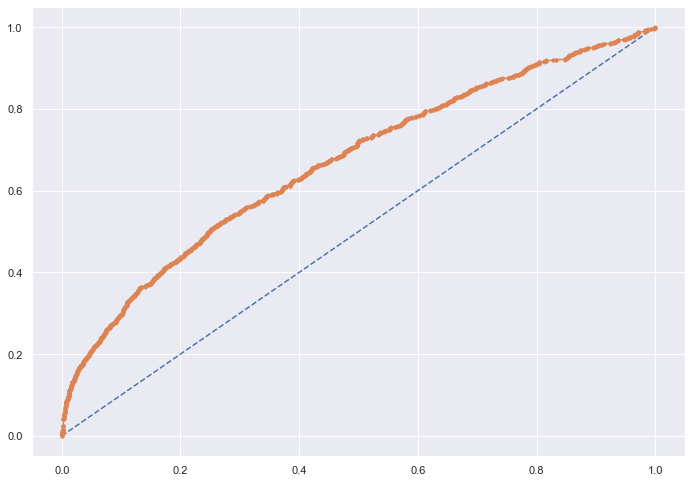

In [136]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

### Rastgele Sınıflandırıcısı

In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

## Rastgele Sınıflandırıcı Eğitimi

In [138]:
from sklearn.ensemble import GradientBoostingClassifier
rfc = RandomForestClassifier(n_estimators=100)
finalModel_rfc = Convert_Model(X_train,y_train,X_test,y_test,rfc)

0.6465974370304906
[[10954   174]
 [ 6224   752]]
0.6465974370304906
0.8120950323974082
0.10779816513761468
f1 score 0.19033156162996712


## Test

AUC: 0.671


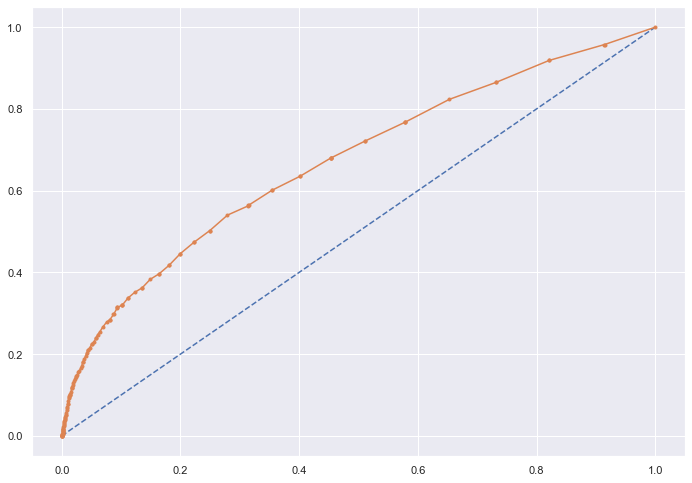

In [139]:
probs = finalModel_rfc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

## Özellik Önemi

In [140]:
data_clean.head()

,age,default,balance,housing,loan,campaign,y,day2,job_admin,job_blue-collar,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
38015,1,1,303,-1,1,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2281,2,1,714,-1,1,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
36629,1,1,1470,-1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6087,3,1,109,-1,1,3,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
11792,2,1,14,-1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [141]:
X = data_clean.drop('y', axis=1).values
y = data_clean['y'].values
pp=data_clean.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
feature_importances = pd.DataFrame(rfc.feature_importances_,index = pp.columns,columns=['importance']).sort_values('importance',ascending=False)

In [142]:
feature_importances

,importance
balance,0.229698
campaign,0.069498
age,0.066064
contact_unknown,0.027158
housing,0.025851
...,...
day_1,0.003059
day_31,0.002988
day_24,0.002657
month_dec,0.000046


## Destek Vektör Makinesi (DVM) Sınıflandırıcı

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## 2 kat Çapraz Doğrulama puanına dayalı olarak DVM sınıflandırıcısı için en iyi parametreleri seçme

In [144]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1], 'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

In [145]:
clf = GridSearchCV(SVC(), tuned_parameters, cv=2, scoring='precision')

In [146]:
finalModel_gb = Convert_Model(X_train,y_train,X_test,y_test,clf)

0.0
[[11128     0]
 [ 6976     0]]
0.6146707909854175
0.0
0.0
f1 score nan


In [147]:
print('The best model is: ', finalModel_gb.best_params_)
print('This model produces a mean cross-validated score (precision) of', finalModel_gb.best_score_)

The best model is:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
This model produces a mean cross-validated score (precision) of 0.8427219323240317


## Test

In [148]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
y_true, y_pred = y_test, finalModel_gb.predict(X_test)
pre1 = precision_score(y_true, y_pred)
rec1 = recall_score(y_true, y_pred)
acc1 = accuracy_score(y_true, y_pred)
f1_1 = f1_score(y_true, y_pred)
print('precision on the evaluation set: ', pre1)
print('recall on the evaluation set: ', rec1)
print('accuracy on the evaluation set: ', acc1)
print("F1 on the evaluation set",f1_1)

precision on the evaluation set:  0.0
recall on the evaluation set:  0.0
accuracy on the evaluation set:  0.6146707909854175
F1 on the evaluation set 0.0


AUC: 0.500


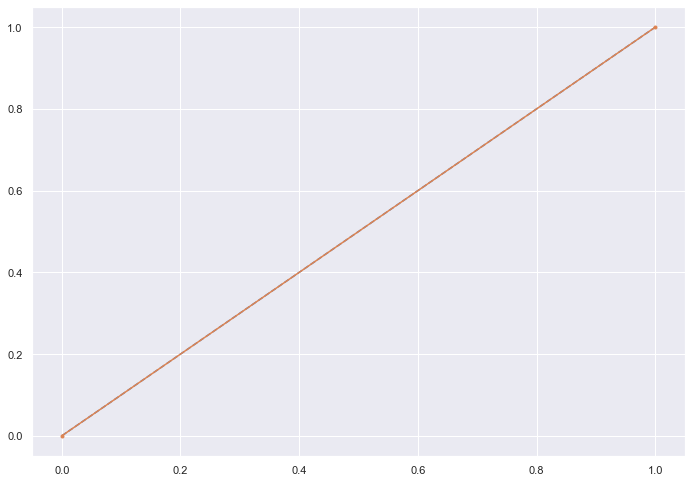

In [149]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_gb.predict(X_test)
# keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

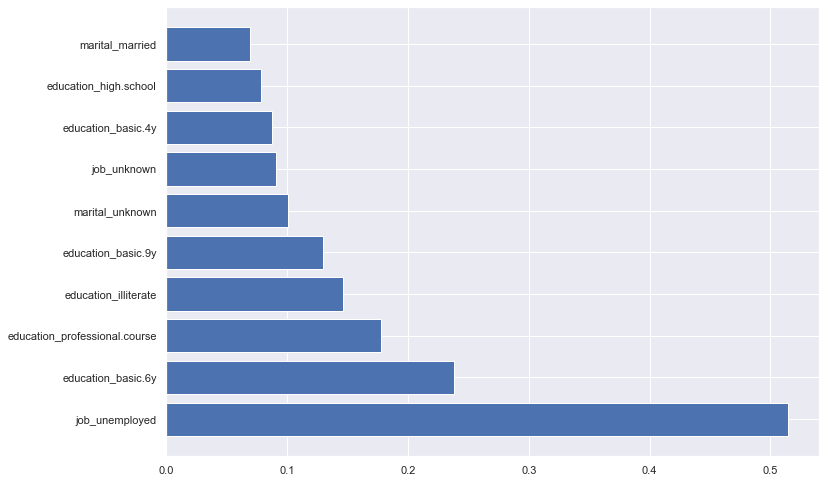

In [150]:
from matplotlib import pyplot as plt
from sklearn import svm
from matplotlib import pyplot as plt
X = data_clean.drop('y', axis=1).values
y = data_clean['y'].values
pp=data_clean.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)



def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# whatever your features are called
features_names = ['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'] 
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)

# Specify your top n features you want to visualize.
# You can also discard teh abs() function 
# if you are interested in negative contribution of features
f_importances(abs(svm.coef_[0]), features_names, top=10)

PCA Kullanarak Özellikleri Azaltma

## Classify the model using XGBClassifier

In [151]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [152]:
# fit model no training data
model = XGBClassifier()
finalModel_XGB = Convert_Model(X_train,y_train,X_test,y_test,model)

[22:07:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.6880799823243482
[[10369   759]
 [ 4888  2088]]
0.6880799823243482
0.7334035827186512
0.2993119266055046
f1 score 0.42512470731955615


AUC: 0.684


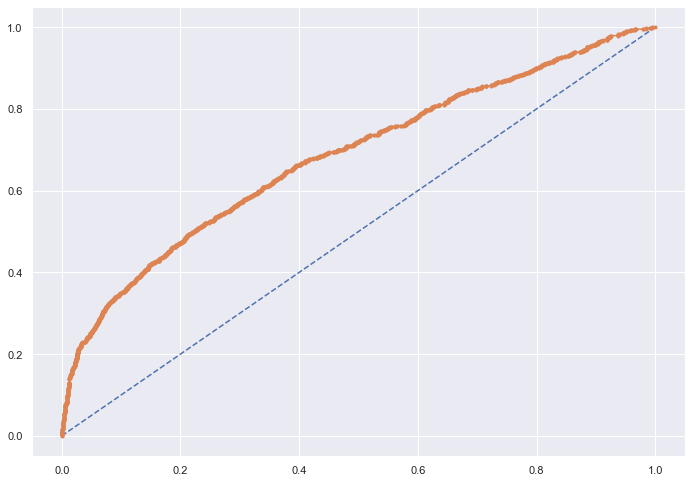

In [153]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = finalModel_XGB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [154]:
X = data_clean.drop('y', axis=1).values
y = data_clean['y'].values
pp=data_clean.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
rmodel = XGBClassifier()
rmodel.fit(X_train, y_train)
feature_importances = pd.DataFrame(rmodel.feature_importances_,index = pp.columns,columns=['importance']).sort_values('importance',ascending=False)

[22:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [155]:
feature_importances

,importance
contact_unknown,0.059151
month_mar,0.057621
month_apr,0.041853
month_jun,0.039571
month_oct,0.035848
...,...
job_retired,0.007417
day_24,0.006925
day_2,0.006442
month_dec,0.002090


## 3 katmanlı MLP Sınıflandırıcı

In [156]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
seed = 7
test_size = 0.33
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [157]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = mlp.predict(X_test)
#print the confusion matrix
print(confusion_matrix(y_test,predictions))

[[4097 7031]
 [2448 4528]]


In [158]:
#Print the classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.37      0.46     11128
           1       0.39      0.65      0.49      6976

    accuracy                           0.48     18104
   macro avg       0.51      0.51      0.48     18104
weighted avg       0.54      0.48      0.47     18104



In [159]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


classifier_mlp = MLPClassifier(hidden_layer_sizes=(13,14,15 ) ,max_iter=500)
finalModel_mlp = Convert_Model(X_train,y_train,X_test,y_test,classifier_mlp)

0.615112682280159
[[11008   120]
 [ 6848   128]]
0.615112682280159
0.5161290322580645
0.01834862385321101
f1 score 0.035437430786268


AUC: 0.553


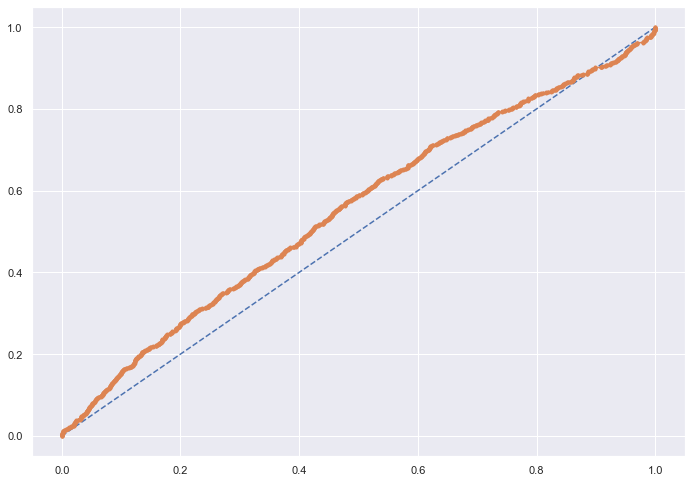

In [160]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_mlp.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

## 2 katmanlı MLP Sınıflandırıcı

In [161]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


classifier_mlp = MLPClassifier(hidden_layer_sizes=(13,13 ) ,max_iter=500)
finalModel_mlp = Convert_Model(X_train,y_train,X_test,y_test,classifier_mlp)

0.5183937251436147
[[5777 5351]
 [3368 3608]]
0.5183937251436147
0.4027235182498047
0.5172018348623854
f1 score 0.4528396611233135


AUC: 0.520


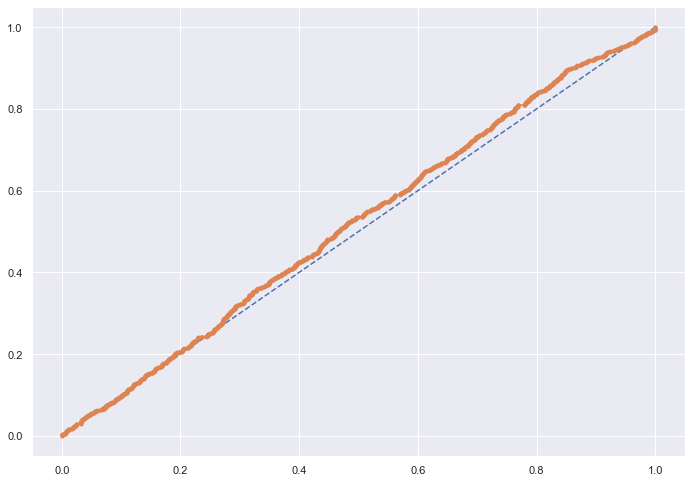

In [162]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_mlp.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

## 1 katmanlı MLP Sınıflandırıcı

In [163]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


classifier_mlp = MLPClassifier(hidden_layer_sizes=(13 ) ,max_iter=500)
finalModel_mlp = Convert_Model(X_train,y_train,X_test,y_test,classifier_mlp)

0.6016349977905435
[[9884 1244]
 [5968 1008]]
0.6016349977905435
0.44760213143872113
0.1444954128440367
f1 score 0.21846553966189855


AUC: 0.532


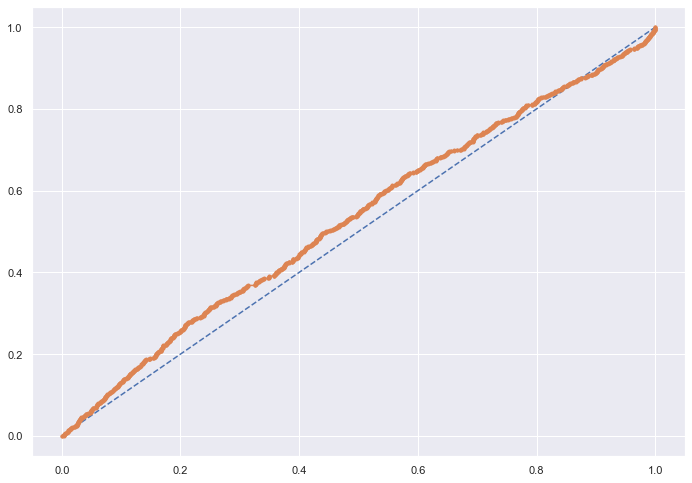

In [164]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_mlp.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [165]:
#by balcing y output
# After standardization our f1 score and auc percentage increases
from prettytable import PrettyTable    
x = PrettyTable()
 
x.field_names = ["MODEL", "ACCURACY_score","precision_score","Recall_score","F1 score","AUC"]
x.add_row(["Dummy classifer",0.50, 0.50,1,0.66,"NAN"])
x.add_row(["Logistic Regression)", 0.73, 0.80,0.62,0.70,0.78])
x.add_row(["Random Forest",0.65, 0.85,0.38,0.52,0.766])
x.add_row(["SVM classifier",0.73, 0.82,0.60,0.69,0.73])
x.add_row(["XGB boost",0.74, 0.81,0.63,0.71,0.798])
x.add_row(["MLP  classifier with 3 layers",0.70, 0.74,0.61,0.67,0.745])
x.add_row(["MLP classifier with 2 layers",0.70, 0.75,0.61,0.68,0.76])
x.add_row(["MLP classifier 1 layers",0.72, 0.78,0.62,0.693,0.766])

print('Bank Marketing')
print(x)

Bank Marketing
+-------------------------------+----------------+-----------------+--------------+----------+-------+
|             MODEL             | ACCURACY_score | precision_score | Recall_score | F1 score |  AUC  |
+-------------------------------+----------------+-----------------+--------------+----------+-------+
|        Dummy classifer        |      0.5       |       0.5       |      1       |   0.66   |  NAN  |
|      Logistic Regression)     |      0.73      |       0.8       |     0.62     |   0.7    |  0.78 |
|         Random Forest         |      0.65      |       0.85      |     0.38     |   0.52   | 0.766 |
|         SVM classifier        |      0.73      |       0.82      |     0.6      |   0.69   |  0.73 |
|           XGB boost           |      0.74      |       0.81      |     0.63     |   0.71   | 0.798 |
| MLP  classifier with 3 layers |      0.7       |       0.74      |     0.61     |   0.67   | 0.745 |
|  MLP classifier with 2 layers |      0.7       |       0